## Fréquence de connexion à l'Espace Client

****
<a id="goal"></a>
### _Objectif : déterminer des cohortes en fonction :_
> 1. du mois de connexion
2. de la promotion
3. du type de contrats (B&You, Sensation...)
4. des pages consultées
****

### Sommaire : 
> 1. Fréquence de connexion : [Frequence](#Frequence)
2. Part ayant consulté le suivi de commande : [SuiviCommande](#suivi)

<a id="etapes"></a>
### Etapes : 
> 1. Chargement et clean / verif du dataframe 
2. Création d'une colonne mois, jour, année (utilisation de la fonction)
3. Création d'un pivot table : 
4. Création d'un pivot table donnant la rétention 
5. Visualisation avec heatmap 

### 1. Chargement du dataFrame et clean >> [lien etapes](#etapes)

In [94]:
# chargement des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#from pydataset import data

# chargement des données
fileVisites = 'C:/Users/mboyer/Documents/dataframe/dataCohort.txt'
fileFoyer = 'C:/Users/mboyer/Documents/dataframe/foyer.txt'
data = pd.read_csv(fileVisites, sep='\t')
foyer = pd.read_csv(fileFoyer, sep='\t')
print('table visite : ' + '\n')
data.head()
print('\n' + 'table foyer : ')
foyer.head()

table visite : 



,date_vente,LM,Famille_Offre,Offre,MOIS_VISITE,NB_CONTRAT,NB_VISITES
0,05/02/1996 00:00:00.000000,MOBILE,VOIX FORFAIT NON BLOQUE,SENSATION,7,2,3
1,05/02/1996 00:00:00.000000,MOBILE,VOIX FORFAIT NON BLOQUE,SENSATION,8,3,6
2,05/02/1996 00:00:00.000000,MOBILE,VOIX FORFAIT NON BLOQUE,SENSATION,9,2,9
3,05/02/1996 00:00:00.000000,MOBILE,VOIX FORFAIT NON BLOQUE,SENSATION,10,3,15
4,05/02/1996 00:00:00.000000,MOBILE,VOIX FORFAIT NON BLOQUE,SENSATION,11,4,26



table foyer : 


,DAT_PHTO,date_vente,anciennete,LM,Offre,Famille_Offre,nb_contrat,nb_foyer
0,23/01/2019,10/10/2018 00:00:00.000000,3,MOBILE,Bbox 4G,Bbox 4G,414,400
1,23/01/2019,16/11/2018 00:00:00.000000,70,FAI,?,FAI FIXE,2886,2811
2,23/01/2019,15/02/2017 00:00:00.000000,23,MOBILE,BYOU,VOIX FORFAIT NON BLOQUE,3736,3541
3,23/01/2019,11/04/2015 00:00:00.000000,45,MOBILE,SIMO,VOIX FORFAIT NON BLOQUE,31,31
4,23/01/2019,04/10/2013 00:00:00.000000,63,MOBILE,SENSATION,DATA MOBILE,22,19


In [95]:
# changement du format des dates : 
data['date_vente'] = pd.to_datetime(data['date_vente'], format="%d/%m/%Y %H:%M:%S.%f")
foyer['date_vente'] = pd.to_datetime(foyer['date_vente'], format="%d/%m/%Y %H:%M:%S.%f")
# check des valeurs null et suppression des lignes
data = data.replace(to_replace='?',value=np.nan)
#print('Tableau avec valeurs vides : ' + '\n')
#data.info()
#data.dropna(axis=0, how='any', inplace=True)
#print('\n' + 'Tableau sans valeurs vides : ' + '\n')
#data.info()
#print('\n' + 'Foyer : ' + '\n')
#foyer.info()

### 2. Date en index et création des mois, année et jour de la date de création de compte

>#### Nombre d'id contrats s'étant connecté depuis le mois de Juillet 

In [96]:
# Application sur la date de vente (= création de compte) : 
data['annee_vente'] = data['date_vente'].dt.year
data['mois_vente'] = data['date_vente'].dt.month
data['jour_vente'] = data['date_vente'].dt.day

foyer['annee_vente'] = foyer['date_vente'].dt.year
foyer['mois_vente'] = foyer['date_vente'].dt.month
foyer['jour_vente'] = foyer['date_vente'].dt.day
#foyer.head()

In [97]:
# Création d'un dataFrame sur l'année 2018 uniquement : 

data2018 = data[(data.annee_vente == 2018) & (data.mois_vente >= 7)]
data2018 = data2018.set_index('mois_vente')

# Création du pivot : 
print('\n'+'Nombre d\'id contrats BYOU :' )
BYOU = data2018[data2018.Offre == 'BYOU'].pivot_table(index='mois_vente',  columns=['MOIS_VISITE'], values='NB_CONTRAT', aggfunc='sum'
                                                    )
BYOU

print('\n'+'Nombre d\'id contrats SENSATION :' )
SENSATION = data2018[data2018.Offre == 'SENSATION'].pivot_table(index='mois_vente', columns=['MOIS_VISITE'], values='NB_CONTRAT',
                                                      aggfunc='sum')
SENSATION

print('\n'+'Nombre d\'id contrats SIMO :' )
SIMO = data2018[data2018.Offre == 'SIMO'].pivot_table(index='mois_vente', columns=['MOIS_VISITE'], values='NB_CONTRAT',
                                                      aggfunc='sum')
SIMO


Nombre d'id contrats BYOU :


MOIS_VISITE,7,8,9,10,11,12
mois_vente,,,,,,
7,15732,26101,23817,21614,21027,20866
8,2706,86086,63381,52915,50023,49280
9,57,19649,279689,170280,150651,142446
10,6,85,3332,40825,32649,28310
11,4,27,156,3301,81104,53341
12,4,15,37,121,6557,98515



Nombre d'id contrats SENSATION :


MOIS_VISITE,7,8,9,10,11,12
mois_vente,,,,,,
7,15701,27891,26176,25121,25207,24616
8,590,24140,26196,24041,23854,23405
9,5,557,29109,31186,29417,28375
10,5,23,591,25594,28152,26491
11,2,12,19,376,27153,30215
12,2,3,3,17,621,45283



Nombre d'id contrats SIMO :


MOIS_VISITE,7,8,9,10,11,12
mois_vente,,,,,,
7,6200.0,11742.0,11082.0,10378.0,10326.0,10007.0
8,394.0,14277.0,15727.0,14296.0,13940.0,13335.0
9,1.0,287.0,14642.0,15636.0,14908.0,14269.0
10,NaN,2.0,291.0,11869.0,13087.0,12385.0
11,NaN,2.0,5.0,141.0,9347.0,10195.0
12,2.0,NaN,NaN,6.0,201.0,10363.0


> Parc Mobile et FAI avec date d'acquisition depuis Juillet 

In [98]:
# Récupération du nombre d'id contrats acquis entre Juillet 2018 et Décembre 2018 : 
foyer2018 = foyer[(foyer.annee_vente == 2018) & (foyer.mois_vente >= 7)]
foyer2018 = foyer2018.set_index('mois_vente')

# Création du pivot : 
print('\n'+'Nombre d\'id contrats BYOU :' )
foyerBYOU = foyer2018[foyer2018.Offre == 'BYOU'].pivot_table(index='mois_vente', values='nb_contrat', aggfunc='sum')
foyerBYOU
print('\n'+'Nombre d\'id contrats SENSATION :' )
foyerSENSATION = foyer2018[foyer2018.Offre == 'SENSATION'].pivot_table(index='mois_vente', values='nb_contrat', aggfunc='sum')
foyerSENSATION
print('\n'+'Nombre d\'id contrats SIMO :' )
foyerSIMO = foyer2018[foyer2018.Offre == 'SIMO'].pivot_table(index='mois_vente', values='nb_contrat', aggfunc='sum')
foyerSIMO

print('\n'+'Nombre d\'id contrats par Ligne de marché :' )
parc = foyer[['LM', 'nb_contrat']].groupby(by='LM').sum()
parc


Nombre d'id contrats BYOU :


,nb_contrat
mois_vente,
7,47504
8,106832
9,333864
10,59257
11,103000
12,120860



Nombre d'id contrats SENSATION :


,nb_contrat
mois_vente,
7,55376
8,51538
9,59685
10,54786
11,57708
12,93050



Nombre d'id contrats SIMO :


,nb_contrat
mois_vente,
7,25824
8,32901
9,33892
10,28610
11,22438
12,24466



Nombre d'id contrats par Ligne de marché :


,nb_contrat
LM,
FAI,3548722
MOBILE,9747412


> Fréquence de connexion :

In [99]:
# Calcul de la fréquence : 
#BYOU : 
for i in range(0,len(BYOU)):
    BYOU.iloc[i] = BYOU.iloc[i].divide(foyerBYOU['nb_contrat'].iloc[i]) * 100

BYOU = BYOU.round(1)

#SENSATION : 
for i in range(0,len(SENSATION)):
    SENSATION.iloc[i] = SENSATION.iloc[i].divide(foyerSENSATION['nb_contrat'].iloc[i]) * 100

SENSATION = SENSATION.round(1)

#SIMO : 
for i in range(0,len(SIMO)):
    SIMO.iloc[i] = SIMO.iloc[i].divide(foyerSIMO['nb_contrat'].iloc[i]) * 100

SIMO = SIMO.round(1)

<a id="Frequence"></a>

Fréquence de connexion à l'espace client post achat 



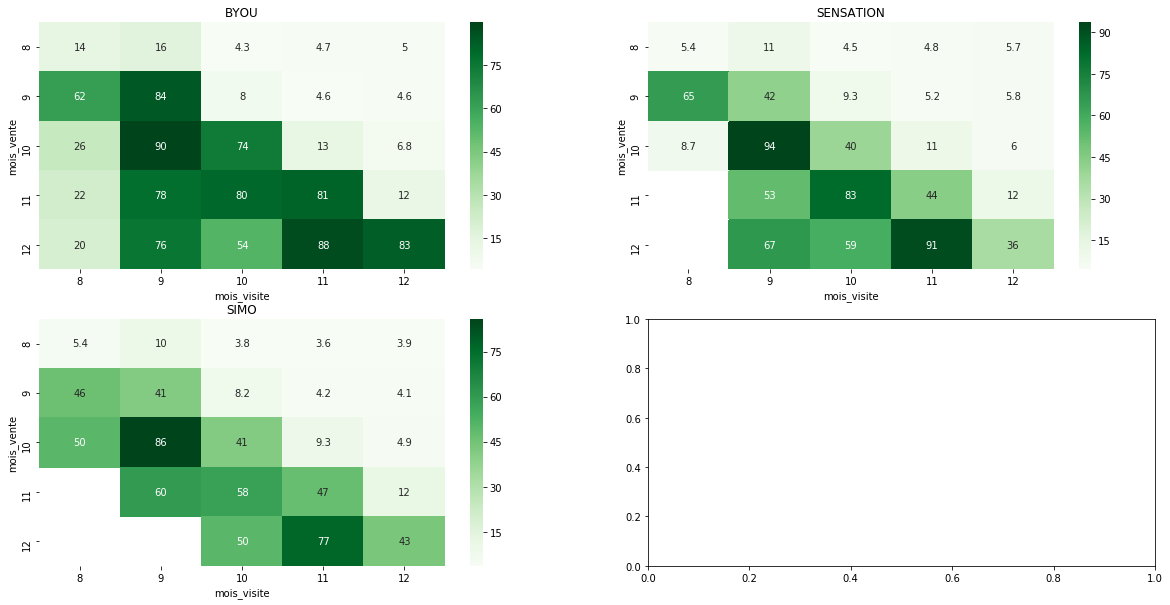

In [116]:
# Visualisation en cohort : 
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 10))
ax1.set_title('BYOU')
ax2.set_title('SENSATION')
ax3.set_title('SIMO')
sns.heatmap(BYOU, annot=True, ax=ax1, cmap='Greens') 
sns.heatmap(SENSATION, annot=True, ax=ax2, cmap='Greens') 
sns.heatmap(SIMO, annot=True, ax=ax3, cmap='Greens') 
print("Fréquence de connexion à l'espace client post achat " + '\n')
plt.show();

***

### Part des visites ayant vu le suivi conso 

In [101]:
fileSuivi = 'C:/Users/mboyer/Documents/dataframe/suiviConso2.txt'
suiviConso = pd.read_csv(fileSuivi, sep='\t')
suiviConso['date_vente'] = pd.to_datetime(suiviConso['date_vente'], format='%d/%m/%Y %H:%M:%S.%f')
suiviConso['annee_vente'] = suiviConso['date_vente'].dt.year
suiviConso['mois_vente'] = suiviConso['date_vente'].dt.month
suiviConso.head()

,date_vente,LM,Offre,Famille_Offre,mois_visite,nb_contrat,NB_VISITES,annee_vente,mois_vente
0,2013-07-03,FAI,?,FAI FIXE,11,8,19,2013,7
1,2016-06-01,MOBILE,SIMO,VOIX FORFAIT NON BLOQUE,12,2,47,2016,6
2,2016-06-06,MOBILE,SENSATION,VOIX FORFAIT NON BLOQUE,8,1,1,2016,6
3,2006-07-20,MOBILE,SENSATION,VOIX FORFAIT NON BLOQUE,11,5,8,2006,7
4,2011-04-11,FAI,?,FAI FIXE,9,7,12,2011,4


In [102]:
# Création d'un dataFrame sur l'année 2018 uniquement : 

suiviConso2018 = suiviConso[(suiviConso.annee_vente == 2018) & (suiviConso.mois_vente >= 8)]
suiviConso2018 = suiviConso2018.set_index('mois_vente')

# Création du pivot : 
print('\n'+'Nombre d\'id contrats BYOU :' )
suiviConsoBYOU = suiviConso2018[suiviConso2018.Offre == 'BYOU'].pivot_table(index='mois_vente',  columns=['mois_visite'], 
                                                                            values='nb_contrat', aggfunc='sum'
                                                    )
suiviConsoBYOU

print('\n'+'Nombre d\'id contrats SENSATION :' )
suiviConsoSENSATION = suiviConso2018[suiviConso2018.Offre == 'SENSATION'].pivot_table(index='mois_vente', columns=['mois_visite'], 
                                                                                    values='nb_contrat',aggfunc='sum')
suiviConsoSENSATION

print('\n'+'Nombre d\'id contrats SIMO :' )
suiviConsoSIMO = suiviConso2018[suiviConso2018.Offre == 'SIMO'].pivot_table(index='mois_vente', columns=['mois_visite'], 
                                                                            values='nb_contrat',
                                                      aggfunc='sum')
suiviConsoSIMO


Nombre d'id contrats BYOU :


mois_visite,8,9,10,11,12
mois_vente,,,,,
8,11964,10343,2261,2332,2470
9,12162,235000,13653,6929,6616
10,22,2988,30225,4297,1912
11,6,122,2650,66063,6507
12,3,28,65,5748,81729



Nombre d'id contrats SENSATION :


mois_visite,8,9,10,11,12
mois_vente,,,,,
8,1307.0,2790.0,1072.0,1151.0,1323.0
9,363.0,12249.0,2913.0,1524.0,1638.0
10,2.0,553.0,10125.0,3038.0,1594.0
11,NaN,10.0,311.0,11963.0,3510.0
12,NaN,2.0,10.0,566.0,16139.0



Nombre d'id contrats SIMO :


mois_visite,8,9,10,11,12
mois_vente,,,,,
8,776.0,1619.0,538.0,499.0,520.0
9,133.0,6066.0,1280.0,620.0,589.0
10,1.0,250.0,4903.0,1219.0,612.0
11,NaN,3.0,82.0,4393.0,1173.0
12,NaN,NaN,3.0,155.0,4501.0


In [106]:
suiviConso2018.pivot_table(index='mois_visite', columns='Offre', values=['NB_VISITES', 'nb_contrat'], aggfunc='sum',
                          margins=True, fill_value=0)

NB_VISITES                                                         \
Offre                ? ANCIEN     BYOU Bbox 4G Data SAV FORFAIT PRO SENSATION   
mois_visite                                                                     
8                 3893      0    37133     441       53           0      3388   
9                62183      7   604065    5631     1917           0     55629   
10               42596      2   103361    5337     1809           0     49036   
11               57948      4   210714    7793     1727          14     67971   
12               66988     20   247590    9660     3927           7     86884   
All             233608     33  1202863   28862     9433          21    262908   

                            nb_contrat                                  \
Offre         SIMO      All          ? ANCIEN    BYOU Bbox 4G Data SAV   
mois_visite                                                              
8             1305    46213       2273      0   24157     211       28   
9            17972   747404      22728      5  248481    1587      721   
10           14550   216691      15659      3   48854    1589      750   
11           15853   362024      19042      4   85369    2314      767   
12           16960   432036      21563     12   99234    2972     1518   
All          66640  1804368      81265     24  506095    8673     3784   

                                                  
Offre       FORFAIT PRO SENSATION   SIMO     All  
mois_visite                                       
8                     0      1672    910   29251  
9                     0     15604   7938  297064  
10                    0     14431   6806   88092  
11                    2     18242   6886  132626  
12                    2     24204   7395  156900  
All                   4     74153  29935  703933

<a id="suivi"></a>

part des connexion venant consulter le suivi de commande


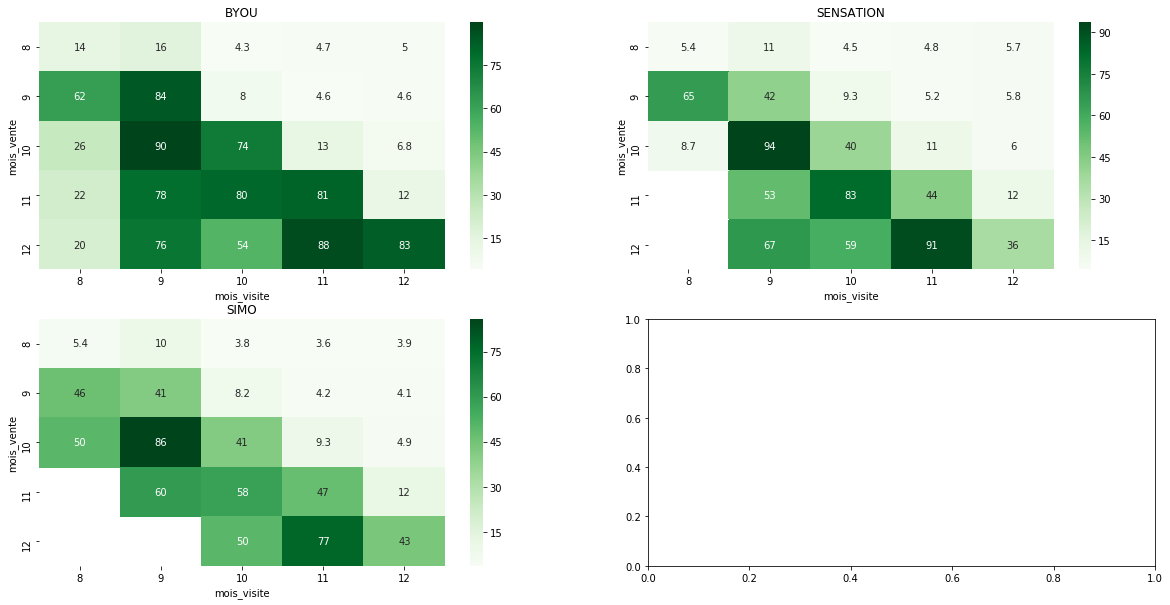

In [117]:
# Création d'un dataFrame sur l'année 2018 uniquement : 

data2018 = data[(data.annee_vente == 2018) & (data.mois_vente >= 8) & (data.MOIS_VISITE >= 8)]
data2018 = data2018.set_index('mois_vente')

# Création du pivot : 
BYOU = data2018[data2018.Offre == 'BYOU'].pivot_table(index='mois_vente',  columns=['MOIS_VISITE'], values='NB_CONTRAT', aggfunc='sum'
                                                    )
BYOU = suiviConsoBYOU.divide(BYOU) * 100

SENSATION = data2018[data2018.Offre == 'SENSATION'].pivot_table(index='mois_vente', columns=['MOIS_VISITE'], values='NB_CONTRAT',
                                                      aggfunc='sum')
SENSATION = suiviConsoSENSATION.divide(SENSATION) * 100

SIMO = data2018[data2018.Offre == 'SIMO'].pivot_table(index='mois_vente', columns=['MOIS_VISITE'], values='NB_CONTRAT',
                                                      aggfunc='sum')
SIMO = suiviConsoSIMO.divide(SIMO) * 100

# Visualisation en cohort : 
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 10))
ax1.set_title('BYOU')
ax2.set_title('SENSATION')
ax3.set_title('SIMO')
sns.heatmap(BYOU, annot=True, ax=ax1, cmap='Greens') 
sns.heatmap(SENSATION, annot=True, ax=ax2, cmap='Greens') 
sns.heatmap(SIMO, annot=True, ax=ax3, cmap='Greens')
print("part des connexion venant consulter le suivi de commande")
plt.show();

****
### _Teradata_ : 
> création d'une table avec : 
<br> liste d'id contrats
<br> date de création de compte (au début que mobile) 
<br> ligne de marché
<br> date de visite

### A vérifier :
- [x] connexion alors que date_vent postérieure
- [x] prendre exemple d'id contrat
- [ ] vérifier volumes de visites pour suivi commande : forcément id personne / contrat ? Pourquoi moins ?



### to do :
- [ ] vérif
- [ ] split par ligne de marché
- [ ] assimilation des promos B&You
- [ ] première page consultée : 